In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def regretmatching(M1, M2, a1, a2, N):
    n_actions_p1 = M1.shape[0] #action space of player 1
    n_actions_p2 = M1.shape[1] #action space of player 2
    
    A1 = np.zeros(N, dtype=int)
    A2 = np.zeros(N, dtype=int)
    U1 = np.zeros(N) #Utility of player 1
    U2 = np.zeros(N) #Utility of player 2   
    R1 = np.zeros(N)  
    R2 = np.zeros(N)  
    
    p1_next = np.zeros(n_actions_p1) #probability of choosing action for player 1
    p2_next = np.zeros(n_actions_p2) #probability of choosing action for player 2

    A1[0] = a1
    A2[0] = a2
    
    for t in range(N):
        regret1 = np.zeros(n_actions_p1) #regrets of player 1
        regret2 = np.zeros(n_actions_p2) #regrets of player 2

        # print(A1[t], A2[t])
        U1[t] = M1[A1[t], A2[t]] #utility of player 1
        for i in range(n_actions_p1): #for each action
            for j in range(t+1): 
                regret1[i] += (M1[i, A2[j]] - U1[j])/(t+1) #average regret
                # print(regret1[i])
            if regret1[i] < 0:
                regret1[i] = 0 #regret is non-negative
        # print(regret1)
        R1[t] = np.max(regret1) #max regret
    
        if np.sum(regret1) != 0:
            for k in range(n_actions_p1):
                p1_next[k] = regret1[k] / np.sum(regret1) #probability of choosing action k
        else:
            p1_next = np.ones(n_actions_p1) / n_actions_p1

        if t<=N-2:
            A1[t+1] = np.random.choice(n_actions_p1, p=p1_next) #choose action based on probability
        
        
        U2[t] = M2[A1[t], A2[t]]
        for i in range(n_actions_p2):
            for j in range(t+1):
                regret2[i] += (M2[A1[j], i] - U2[j])/(t+1)
            # print(regret2[i])
            if regret2[i] < 0:
                regret2[i] = 0

        R2[t] = np.max(regret2)

        if np.sum(regret2) != 0:
            for k in range(n_actions_p2):
                p2_next[k] = regret2[k] / np.sum(regret2)
        else:
            p2_next = np.ones(n_actions_p2) / n_actions_p2
            
        if t<=N-2:
            A2[t+1] = np.random.choice(n_actions_p2, p=p2_next)

    return A1, A2, R1, R2

1.

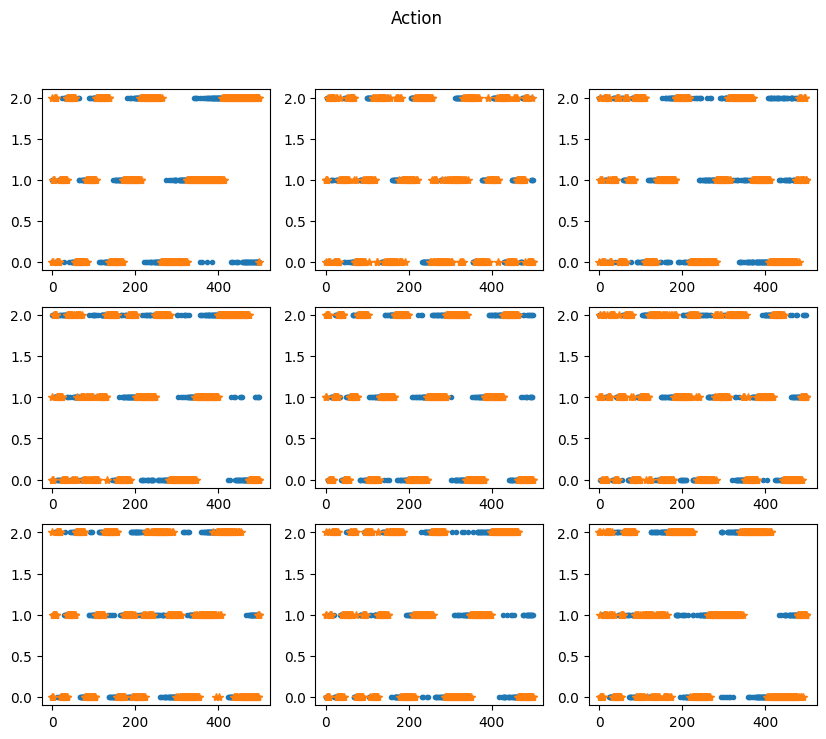

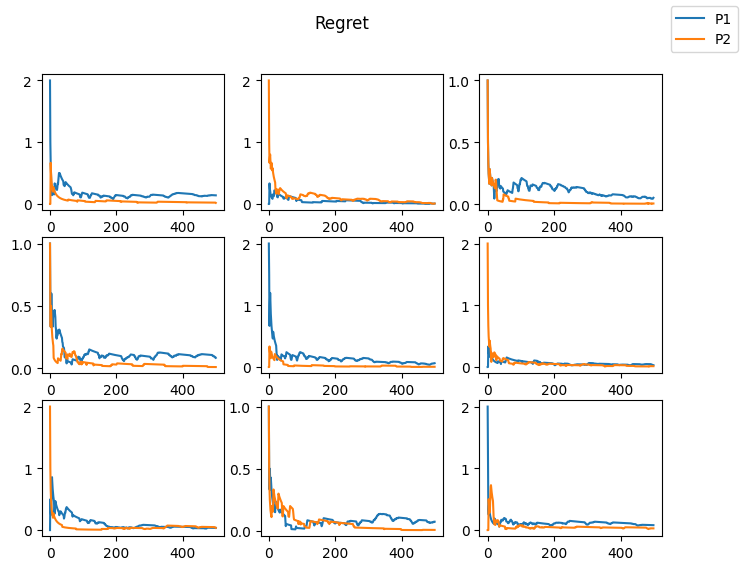

In [ ]:
M1 = np.array(
    [[-1, 0, 1],
     [1, -1, 0],
     [0, 1, -1]]
)
M2 = -M1
N = 500

plt.figure(1,figsize=(8, 6))
plt.suptitle("Regret")
plt.xlabel("Time")
plt.ylabel("Regret")
plt.axis('off')

plt.figure(2,figsize=(10, 8))
plt.suptitle("Action")
# plt.xlabel("Action of player 1")
# plt.ylabel("Action of player 2")
# plt.axis('off')

for a1 in range(3):
    for a2 in range(3):
        A1, A2, R1, R2 = regretmatching(M1, M2, a1, a2, N)
        plt.figure(1)
        ax = plt.subplot(3, 3, a2*3+a1+1)
        ax.plot(R1)
        ax.plot(R2)
        
        plt.figure(2)
        ax2 = plt.subplot(3, 3, a2*3+a1+1)
        ax2.plot(A1,".")
        ax2.plot(A2,".")

fig = plt.figure(1)
fig.legend(["P1", "P2"])
fig = plt.figure(2)
fig.legend(["P1", "P2"])


2.

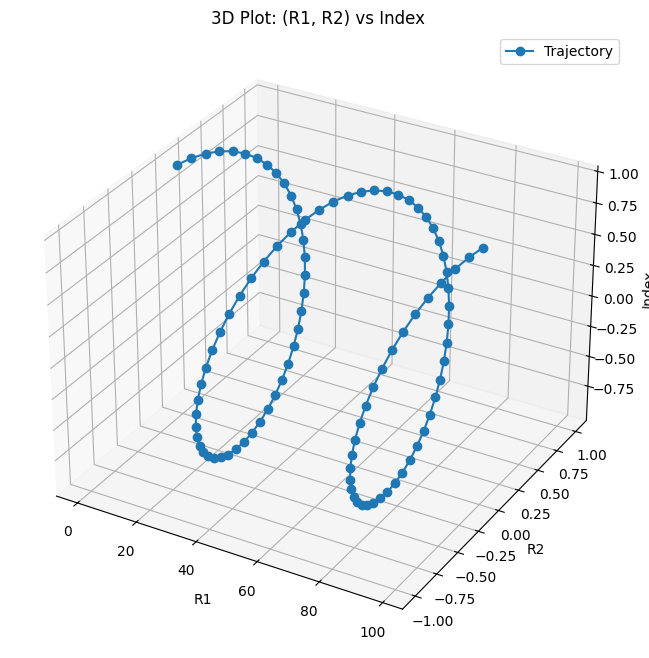

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具

# 示例数据：生成两个一维数组，长度为 N
N = 100
t = np.linspace(0, 4 * np.pi, N)
R1 = np.sin(t)
R2 = np.cos(t)
indices = np.arange(N)  # 第三个维度，表示索引

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D轨迹：R1为x轴, R2为y轴, 索引为z轴
ax.plot(indices,R1,  R2, marker='o', label='Trajectory')

# 添加坐标轴标签和标题
ax.set_xlabel("R1")
ax.set_ylabel("R2")
ax.set_zlabel("Index")
ax.set_title("3D Plot: (R1, R2) vs Index")
ax.legend()

plt.show()
